# W11-04 Construcción de una ConvNet

En esta actividad construiremos una Red Neuronal Convolucional simple que contenga:

1) Extractor de características

2) Clasificador

Para la construcción de la ConvNet utilicemos la siguiente arquitectura base:

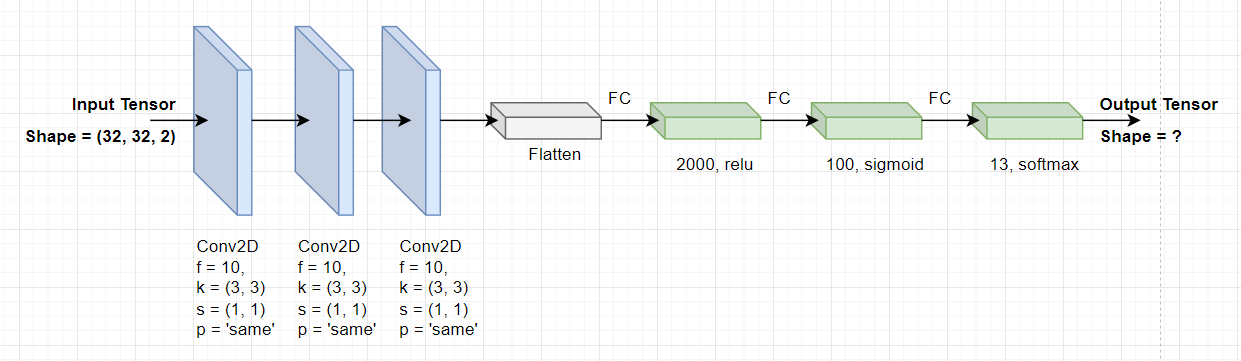

Importemos los módulos y clases que utilizaremos para construir la red neuronal convolucional

In [1]:
#Importemos los módulos y clases que necesitaremos para la actividad
from tensorflow.keras.layers import Input      # Capa para definir el shape del tensor de entrada
from tensorflow.keras.layers import Conv2D     # Capa convolucional (extracción de características)
from tensorflow.keras.layers import Flatten    # Capa para generar el vector de características
from tensorflow.keras.layers import Dense      # Capa dense del perceptrón multicapa (clasificador/regresor)
from tensorflow.keras import Sequential        # API secuencial de Keras para construir un modelo basado en una lista de capas
import tensorflow as tf

Antes de iniciar la construcción de la COnvNet, crearemos un pequeño conjunto de datos sintético en el que tenemos seis ejemplos de entrenamiento con dimensiones (32,32,3) que nos permitirán verificar el correcto funcionamiento de la red neuronal convolucional.

In [2]:
# Creación de datos sintéticos de entrada para la ConvNet
X = tf.ones(shape=(6, 32, 32, 3))   #Todo el conjunto de datos inicializado en 1s
print(X.shape)

(6, 32, 32, 3)


## Construcción de una red neuronal convolucional



In [6]:
ConvNet = Sequential([
    Input(shape=(32, 32, 3)),       #shape del tensor de etrada
    # Extractor de caracteríscas (conformado por 3 capas convolucionales)
    Conv2D(filters=10, kernel_size=(3, 3), strides=(1,1), padding='same'),
    Conv2D(filters=10, kernel_size=(3, 3), strides=(1,1), padding='same'),
    Conv2D(filters=10, kernel_size=(3, 3), strides=(1,1), padding='same'),
    Flatten(),     # Generemos el vector de características
    # Inicio del clasificado
    # Perceptrón multicapa con tres capas
    Dense(units=2000, activation='relu'),
    Dense(units=100, activation='sigmoid'),
    Dense(units=13, activation='softmax')   #Capa de salida para clasificación (13 clases)
    ])

In [7]:
# Probemos la red neuronal, sin entrenar
output=ConvNet(X)

In [8]:
# Verifiquemos la forma del tensor de salida
print(output.shape)

(6, 13)


**¡El entrenamiento, validación y prueba de la red neuronal convolucional es similar al entrenamiento de un perceptrón multicapa!**

In [18]:
model_path = "./models/ConvNet.keras"
ConvNet.save(model_path)   #Guardamos el modelo en disco

In [20]:
# Carguemos el modelo desde disco
loaded_ConvNet = tf.keras.models.load_model(model_path)

# Comprobemos que el modelo cargado es igual al original
loaded_ConvNet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 10)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10240)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2000)           │    20,482,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │       200,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 13)             │         1,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,685,513 (78.91 MB)

 Trainable params: 20,685,513 (78.91 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
loaded_ConvNet.layers

[<Conv2D name=conv2d_3, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <Conv2D name=conv2d_5, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [23]:
print(loaded_ConvNet.layers[5])
loaded_ConvNet.pop()   
loaded_ConvNet.pop()   
loaded_ConvNet.pop() # Eliminamos las ultimas 3 capas densas del modelo

loaded_ConvNet.summary()   # Verificamos que se hayan eliminado las capas densas



<Dense name=dense_4, built=True>


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 10)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10240)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,100 (8.20 KB)

 Trainable params: 2,100 (8.20 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Now we freeze the convolutional base
for layer in loaded_ConvNet.layers:
    layer.trainable = False

loaded_ConvNet.summary(show_trainable=True)   # Verificamos que las capas convolucionales estén congeladas

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ conv2d_3 (Conv2D)           │ (None, 32, 32, 10)    │        280 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_4 (Conv2D)           │ (None, 32, 32, 10)    │        910 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_5 (Conv2D)           │ (None, 32, 32, 10)    │        910 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_1 (Flatten)         │ (None, 10240)         │          0 │   -   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 2,100 (8.20 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,100 (8.20 KB)

In [27]:
#Now we add 3 new dense layers to the model
# 1000 nueron Relu
# 50 neurron Tanh
# 3 neuron Softmax
"""
loaded_ConvNet.add(Dense(units=1000, activation='relu'))
loaded_ConvNet.add(Dense(units=50, activation='tanh'))
loaded_ConvNet.add(Dense(units=3, activation='softmax')) 
"""

newConvNet = Sequential([ loaded_ConvNet, 
                          Dense(units=1000, activation='relu'),
                          Dense(units=50, activation='tanh'),
                          Dense(units=3, activation='softmax')])

newConvNet.summary(show_trainable=True)   # Verificamos la arquitectura del modelo 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ sequential_1 (Sequential)   │ (None, 10240)         │      2,100 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_6 (Dense)             │ (None, 1000)          │ 10,241,000 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_7 (Dense)             │ (None, 50)            │     50,050 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_8 (Dense)             │ (None, 3)             │        153 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 10,293,303 (39.27 MB)

 Trainable params: 10,291,203 (39.26 MB)

 Non-trainable params: 2,100 (8.20 KB)

In [30]:
#Test the new model
output=newConvNet(X)
print(output.shape)
newConvNet.summary()

(6, 3)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 10240)          │         2,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1000)           │    10,241,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │        50,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,293,303 (39.27 MB)

 Trainable params: 10,291,203 (39.26 MB)

 Non-trainable params: 2,100 (8.20 KB)